# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [40]:
import numpy as np
#Part 1
import pandas as pd
ForiegnGifts = pd.read_csv('/ForeignGifts_edu.csv')
shape(ForiegnGifts)


(28221, 10)

<Axes: >

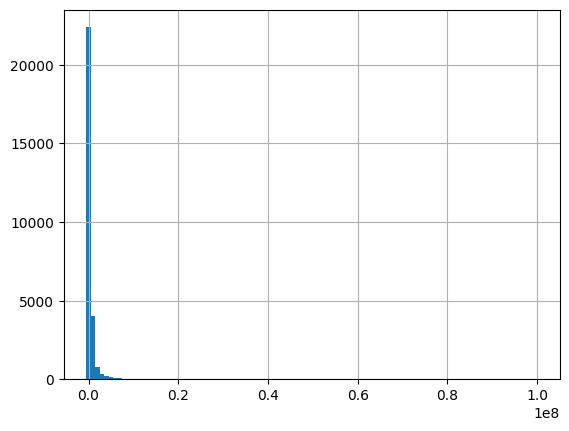

In [22]:
#Part 2
ForiegnGifts['Foreign Gift Amount'].hist(bins=100)
#The majority of gifts seem to be less far than $1m (0.1 on the x-axis scale), but there appears to be at least one very high outlier since the axis goes to 1*10^8, which is 10 Million
#It is right skewed

In [37]:
#Part 3
print(f"Discrete:\n{ForiegnGifts['Gift Type'].value_counts()}")
print(f"\nProportions: \n{ForiegnGifts['Gift Type'].value_counts(normalize=1)}")
#The 2nd output shows the proportions of gift types

Discrete:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportions: 
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


<Axes: title={'center': 'Kernel Desnsity Plot of log(Foregin Gift Amount)'}, xlabel='Log(Foreign Gift Amount)', ylabel='Density'>

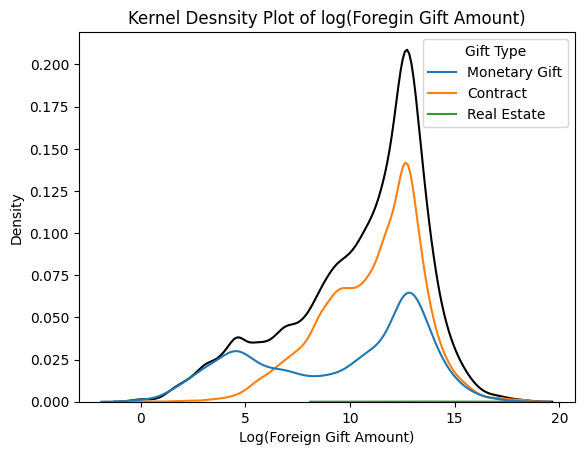

In [53]:
#Part 4
import seaborn as sns
ForiegnGifts['logForeignGiftAmount'] = np.log(ForiegnGifts['Foreign Gift Amount'])
fig = sns.kdeplot(ForiegnGifts['logForeignGiftAmount'], color = 'black')
fig.set(title = "Kernel Desnsity Plot of log(Foregin Gift Amount)", xlabel = 'Log(Foreign Gift Amount)', ylabel = 'Density')
sns.kdeplot(data = ForiegnGifts, x= 'logForeignGiftAmount', hue='Gift Type')
#The upper black plot is the aggregate, the colored ones below are the ones seperated by gift type (see legend)
#All of them peak around ~13, except for real estate which is flat at the bottom

In [59]:
#Part 5
top_15_count = ForiegnGifts['Country of Giftor'].value_counts().head(15)
print(top_15_count)

top_15_sum = ForiegnGifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_sum)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [69]:
#Part 6
top_15_instutions = ForiegnGifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top_15_instutions.head(15)


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

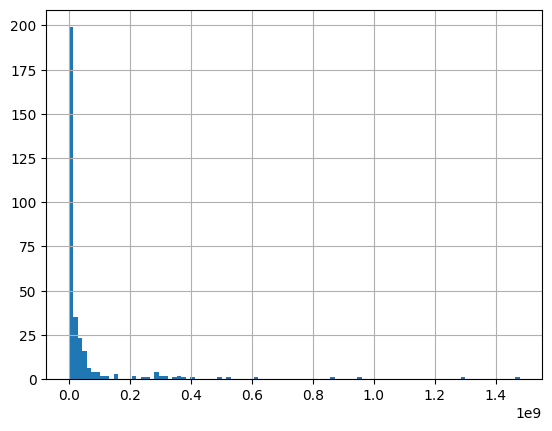

In [68]:
#Part 6 cont
top_15_instutions.hist(bins=100)

In [71]:
#part 7
top_giftors = ForiegnGifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top_giftors.head()

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [72]:
#Part 1
airbnb = pd.read_csv('/airbnb_hw.csv')

In [80]:
#part 2
print(airbnb.shape)
#30478 observations, 13 variables
print(airbnb.columns)
#variables: 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type','Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
#'Number of Records', 'Number Of Reviews', 'Price','Review Scores Rating'
airbnb.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [81]:
#Part 3
pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
#The majority of listings are either entire unit or private room.
#Private rooms are more common than entire unit for the property types: 'House,' 'Dorm', 'Castle', 'Chalet', 'Other', and 'Tent'

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: >

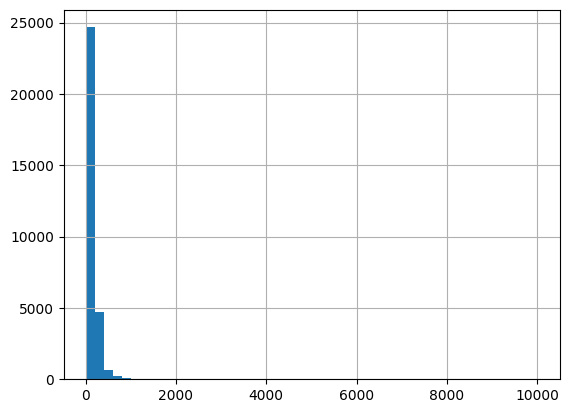

In [91]:
#Part 4
airbnb['Price']=airbnb['Price'].astype(str).str.replace(',','').astype(int)
airbnb['Price'].hist(bins=50)


<Axes: xlabel='Price', ylabel='Density'>

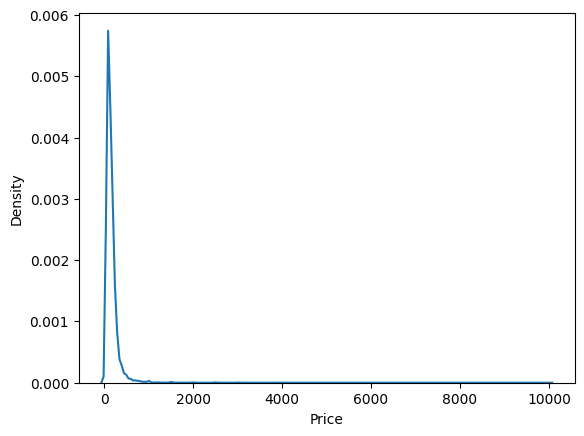

In [92]:
sns.kdeplot(airbnb['Price'])

In [96]:
airbnb['Price'].describe()
#Yes, there apears to be some strong outliers, and data is poorly scaled

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


<Axes: >

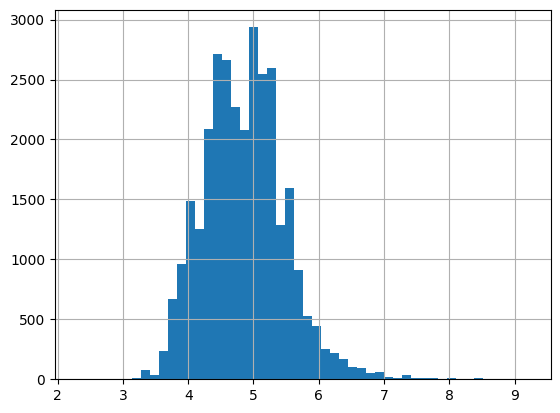

In [97]:
airbnb['Price_log']=np.log(airbnb['Price'])
airbnb['Price_log'].hist(bins=50)

<Axes: xlabel='Price_log', ylabel='Density'>

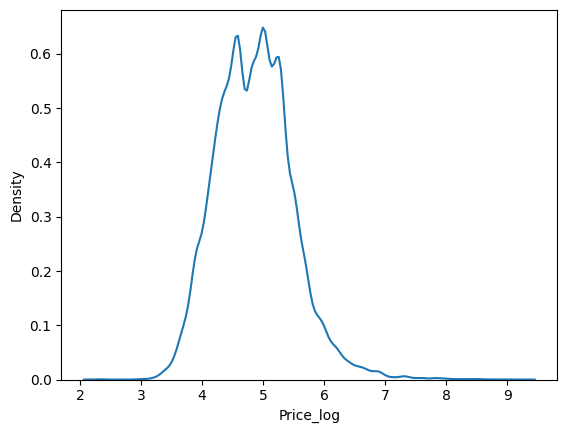

In [98]:
sns.kdeplot(airbnb['Price_log'])

In [99]:
airbnb['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


<Axes: xlabel='Price_log', ylabel='Beds'>

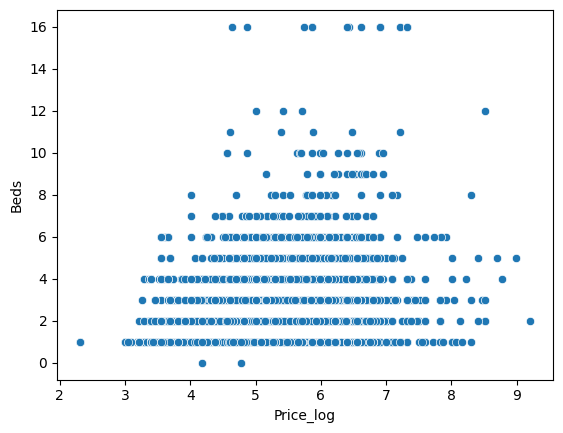

In [101]:
#Part 5
sns.scatterplot(data=airbnb, y='Beds', x='Price_log')
#There does not appear to be a strong patter between price_log and beds, except that the minimum price seems to increase with the # of beds

In [128]:
airbnb.groupby('Beds')['Price'].describe()
#both the mean and standard deviation seem to generally increase with the # of beds

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


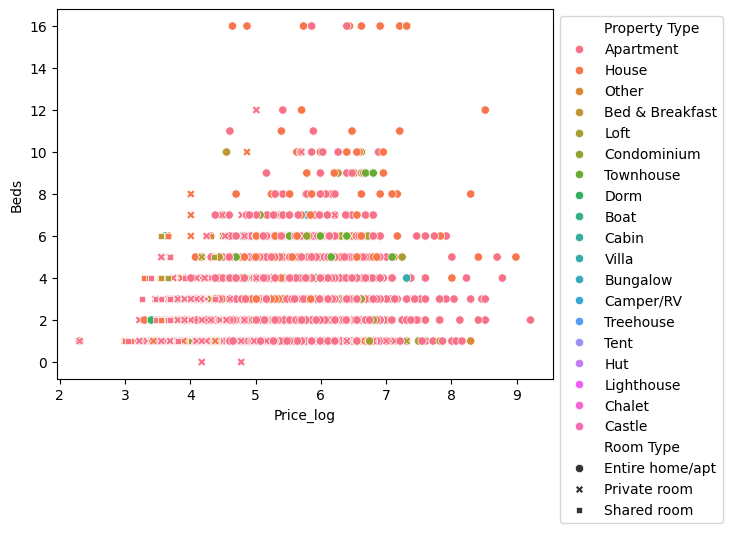

In [125]:
#Part 6
import matplotlib.pyplot as plt
sns.scatterplot(data=airbnb, y='Beds', x='Price_log', style='Room Type', hue='Property Type')
plt.legend(bbox_to_anchor=(1,1))
#The prices seem to get tighter in spread as you increase in beds, and the price seems to increase for entire unit vs private and shared rooms
#Houses seem to be more in higher beds, higher price, while aparments are in lower beds, all levels of price

In [159]:
room_property_type=airbnb.groupby(['Room Type', 'Property Type'])['Price']
room_property_type.mean().max()
room_property_type.std().max()
room_property_type.describe()

#The highest mean is Entire unit, Other with a mean of 843$
#The highest Standard deviation is also Entire unit, Other with a std of 1133
#I think that median is more reliable due to the presense of outliers which will comprimise the reliability of the mean as a measure of central tendency

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

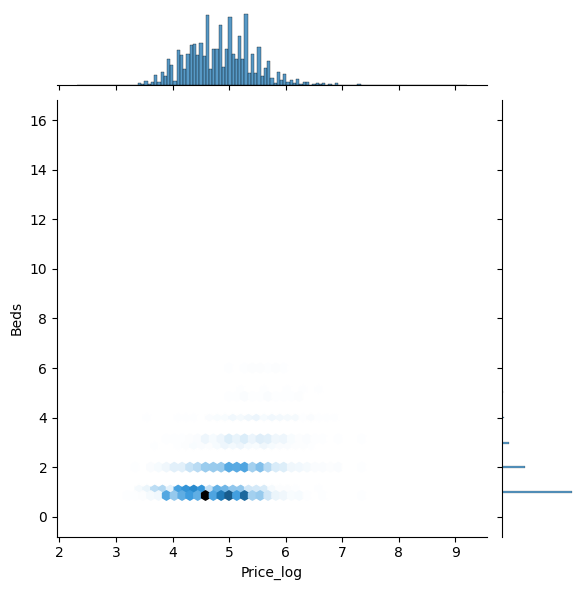

In [161]:
#part 7
sns.jointplot(data=airbnb, x='Price_log', y='Beds', kind='hex')
#This shows that the majority of the listings are in low beds, low-med price
#Yes, this makes me reconsider the previous graphs because there are so many datapoints that they hide each other, while this shows where the majority actually fall, which was not accuratley portrayed by the scatterplot

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [167]:
#Part 1
drilling = pd.read_csv('/drilling_rigs.csv')
print(drilling.shape)
#There are 623 observations and 10 variables
drilling
drilling.dtypes
#The Dates witll not be interpreted correctly and the "Not Avaliable" will not be read correctly
#To fix this we can replace them with np.nan
#Additionally, many variables are treated as objects, not as integers
#We can fix this by coercing the errors of the affected columns

(623, 10)


,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


In [173]:
To_Coerce = ['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
             'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
             'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
             'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
             'Active Well Service Rig Count (Number of Rigs)']
for i in To_Coerce:
  drilling[i] = pd.to_numeric(drilling[i], errors='coerce')
drilling.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),float64


In [176]:
#Part 2
drilling['time'] = pd.to_datetime(drilling['Month'], format='mixed')
drilling

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01
...,...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479.0,101.0,519.0,49.0,18.0,586,NaN,2024-07-01
619,2024 August,566,19,483.0,97.0,521.0,48.0,16.0,586,NaN,2024-08-01
620,2024 September,567,20,486.0,97.0,522.0,50.0,15.0,587,NaN,2024-09-01
621,2024 October,568,18,481.0,101.0,517.0,53.0,15.0,585,NaN,2024-10-01


<Axes: xlabel='time', ylabel='Active Well Service Rig Count (Number of Rigs)'>

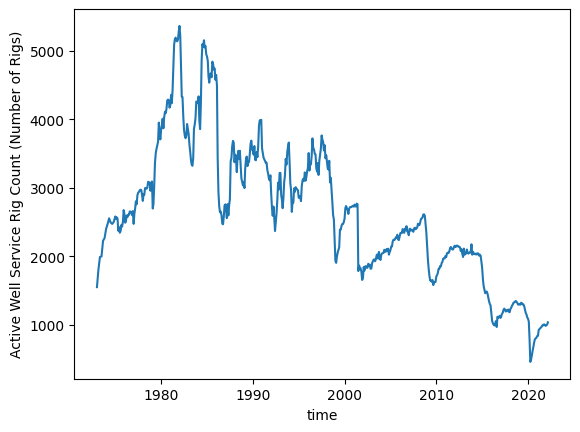

In [177]:
#Part 3
sns.lineplot(data=drilling, x='time', y='Active Well Service Rig Count (Number of Rigs)')
#Seems to be decreasing over time, but in large batches, then it increases before the next large dropoff

<Axes: xlabel='time', ylabel='first difference'>

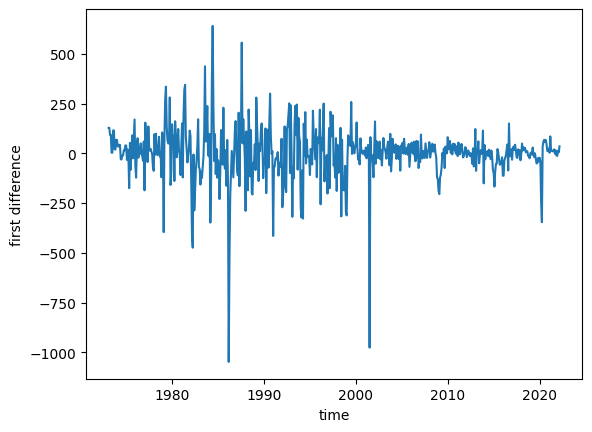

In [182]:
#Part 4
drilling['first difference']= drilling['Active Well Service Rig Count (Number of Rigs)'].diff()
sns.lineplot(data=drilling, x='time', y='first difference')

Text(0, 0.5, 'Number of Drilling Rigs')

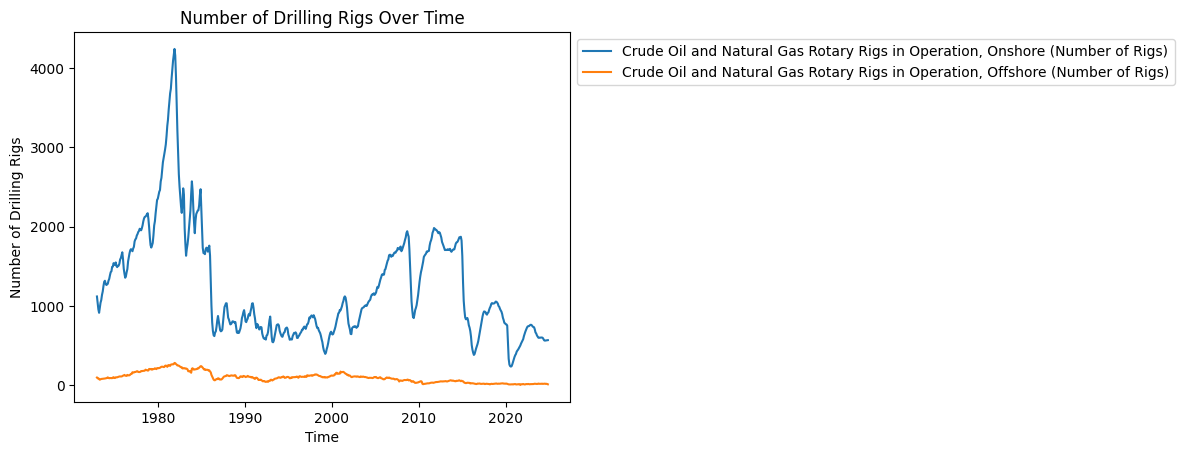

In [194]:
#Part 5
melted_drilling = pd.melt(drilling, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                          'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'])

sns.lineplot(data=melted_drilling, x='time', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Number of Drilling Rigs Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Drilling Rigs')